The final library and code used is after experimentation

Experimenting different approaches :

In [2]:
pip install networkx matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 2.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 4.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 4.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


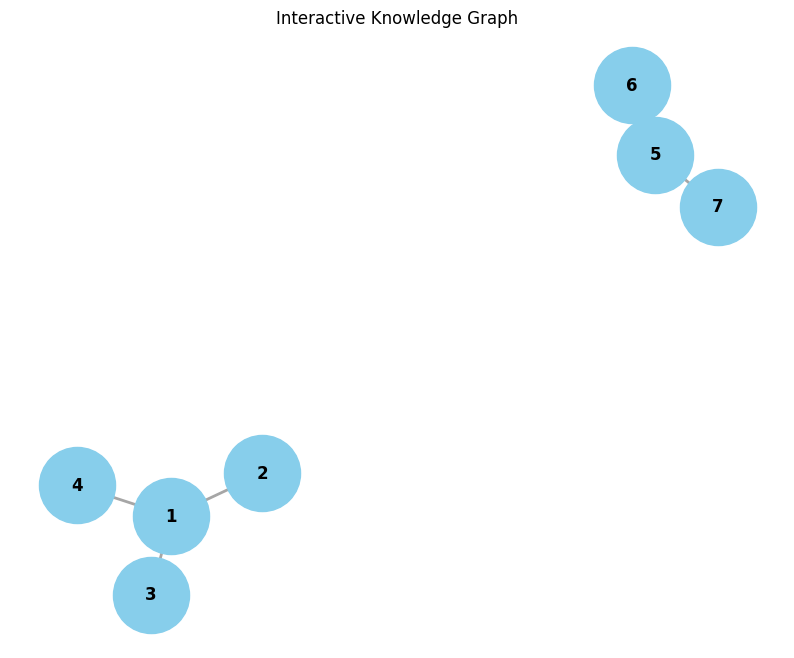

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes (questions and inefficiencies)
G.add_node(1, label="Q1 - Inefficiencies", confidence="Highly Confident")
G.add_node(2, label="Nested Loops")
G.add_node(3, label="Unnecessary Iteration")
G.add_node(4, label="Incorrect Logic")
G.add_node(5, label="Q2 - Inefficiencies", confidence="Medium Confident")
G.add_node(6, label="Excessive Variable Usage")
G.add_node(7, label="Readability Issues")

# Add edges (relationships between questions and inefficiencies)
G.add_edges_from([(1, 2), (1, 3), (1, 4), (5, 6), (5, 7)])

# Set up the layout
pos = nx.spring_layout(G, seed=42)  # positions for all nodes

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color="skyblue")
nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")
nx.draw_networkx_edges(G, pos, width=2, alpha=0.7, edge_color="gray")

# Show the plot
plt.title("Interactive Knowledge Graph")
plt.axis("off")  # Disable axis
plt.show()


In [4]:
pip install py2neo


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
from py2neo import Graph, Node, Relationship

# Connect to local Neo4j instance
graph = Graph("bolt://localhost:7687", auth=("bismansingh", "bismansingh"))

# Create nodes (questions and inefficiencies)
q1 = Node("Question", label="Q1 - Inefficiencies", confidence="Highly Confident")
q2 = Node("Question", label="Q2 - Inefficiencies", confidence="Medium Confident")
n1 = Node("Inefficiency", label="Nested Loops")
n2 = Node("Inefficiency", label="Unnecessary Iteration")
n3 = Node("Inefficiency", label="Incorrect Logic")

# Create relationships (edges between questions and inefficiencies)
r1 = Relationship(q1, "HAS_INEFFICIENCY", n1)
r2 = Relationship(q1, "HAS_INEFFICIENCY", n2)
r3 = Relationship(q1, "HAS_INEFFICIENCY", n3)

# Create the graph in Neo4j
graph.create(q1)
graph.create(q2)
graph.create(n1)
graph.create(n2)
graph.create(n3)
graph.create(r1)
graph.create(r2)
graph.create(r3)

# Once created, you can visualize the graph in the Neo4j Browser UI by querying it.


ConnectionUnavailable: Connection has been closed

In [12]:
pip install pyvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 5.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
from pyvis.network import Network
import networkx as nx

# Create a NetworkX graph
G = nx.Graph()
G.add_node(1, label="Q1 - Inefficiencies", confidence="Highly Confident")
G.add_node(2, label="Nested Loops")
G.add_node(3, label="Unnecessary Iteration")
G.add_node(4, label="Incorrect Logic")
G.add_node(5, label="Q2 - Inefficiencies", confidence="Medium Confident")
G.add_node(6, label="Excessive Variable Usage")
G.add_node(7, label="Readability Issues")

G.add_edges_from([(1, 2), (1, 3), (1, 4), (5, 6), (5, 7)])

# Create a PyVis network from NetworkX
net = Network(notebook=True)

# Convert the NetworkX graph to PyVis format
net.from_nx(G)

# Show the interactive graph in the notebook or export it to HTML
net.save_graph("/Users/bisman/Documents/ECS 260/Project github/CodeRefineAI/llm/RQ1/my_interactive_graph.html")


In [6]:
import plotly.graph_objects as go
import networkx as nx

# Create a sample graph (simple graph for demonstration)
G = nx.erdos_renyi_graph(10, 0.3)

# Get node positions using a layout algorithm (spring layout for 2D)
pos = nx.spring_layout(G)

# Create lists for node positions and edge positions
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_y.append(y0)
    edge_y.append(y1)

# Create lists for node positions and node labels
node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

# Create a scatter plot for nodes
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections'
        )
    )
)

# Create a scatter plot for edges
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# Create the figure with both nodes and edges
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title="Network Graph",
                    title_font_size=16,  # Corrected property
                    showlegend=False,
                    hovermode='closest',
                    plot_bgcolor='rgb(255, 255, 255)',
                    xaxis=dict(showgrid=False),
                    yaxis=dict(showgrid=False),
                    height=600,  # Adjust height as needed
                    width=600   # Adjust width as needed
                ))

# Show the plot
fig.show()


The Final working and effective knowledge graph is made using the below code : 

In [ ]:
import json
from pyvis.network import Network
import networkx as nx

# Load the dataset from JSON file
with open("/Users/bisman/Documents/ECS 260/Project github/CodeRefineAI/dataset/RQ1KG/Inefficient_reasoning_bter.json", "r") as file:
    data = json.load(file)

# Create a NetworkX graph
G = nx.Graph()

# Create unique nodes for categories
confidence_levels = set()
sentiments = set()
inefficiencies = set()

# Add nodes for each question and their respective attributes
for entry in data:
    q_id = entry["question_id"]
    confidence = entry["confidence_level"]
    sentiment = entry["sentiment"]
    reasoning = entry["reasoning"]

    # Format reasoning with actual line breaks
    formatted_reasoning = "\n".join(reasoning[i:i+80] for i in range(0, len(reasoning), 80))

    # Ensure unique category nodes
    confidence_levels.add(confidence)
    sentiments.add(sentiment)

    # Add inefficiency categories
    for ineff in entry["inefficiencies"]:
        inefficiencies.add(ineff)

    # Add question node with formatted reasoning
    G.add_node(q_id, label=f"Q{q_id}", shape="circle", title=formatted_reasoning)

    # Connect question to confidence level, sentiment, and inefficiencies
    G.add_edge(q_id, confidence)
    G.add_edge(q_id, sentiment)
    for ineff in entry["inefficiencies"]:
        G.add_edge(q_id, ineff)

# Add category nodes to the graph
for conf in confidence_levels:
    G.add_node(conf, label=conf, color="red", shape="square")

for sent in sentiments:
    G.add_node(sent, label=sent, color="blue", shape="square")

for ineff in inefficiencies:
    G.add_node(ineff, label=ineff, color="green", shape="square")

# Create a PyVis network
net = Network(notebook=True, directed=False)

# Enable physics to improve layout
net.toggle_physics(True)

# Convert to PyVis format
net.from_nx(G)

# Save and display the graph
net.save_graph("/Users/bisman/Documents/ECS 260/Project github/CodeRefineAI/llm/RQ1/my_interactive_graph.html")
print("Graph saved as knowledge_graph.html")


Tried to reduce the categories of inefficiency thinking to make a simpler graph but the edges got even more complex using the below code : 

In [2]:
import json
from pyvis.network import Network
import networkx as nx

# Load the dataset from JSON file
with open("/Users/bisman/Documents/ECS 260/Project github/CodeRefineAI/dataset/RQ1KG/Inefficient_reasoning_improving.json", "r") as file:
    data = json.load(file)

# Create a NetworkX graph
G = nx.Graph()

# Create unique nodes for categories
confidence_levels = set()
sentiments = set()
inefficiencies = set()

# Add nodes for each question and their respective attributes
for entry in data:
    q_id = entry["question_id"]
    confidence = entry["confidence_level"]
    sentiment = entry["sentiment"]
    reasoning = entry["reasoning"]

    # Format reasoning with actual line breaks
    formatted_reasoning = "\n".join(reasoning[i:i+80] for i in range(0, len(reasoning), 80))

    # Ensure unique category nodes
    confidence_levels.add(confidence)
    sentiments.add(sentiment)

    # Add inefficiency categories
    for ineff in entry["inefficiencies"]:
        inefficiencies.add(ineff)

    # Add question node with formatted reasoning
    G.add_node(q_id, label=f"Q{q_id}", shape="circle", title=formatted_reasoning)

    # Connect question to confidence level, sentiment, and inefficiencies
    G.add_edge(q_id, confidence)
    G.add_edge(q_id, sentiment)
    for ineff in entry["inefficiencies"]:
        G.add_edge(q_id, ineff)

# Add category nodes to the graph
for conf in confidence_levels:
    G.add_node(conf, label=conf, color="red", shape="square")

for sent in sentiments:
    G.add_node(sent, label=sent, color="blue", shape="square")

for ineff in inefficiencies:
    G.add_node(ineff, label=ineff, color="green", shape="square")

# Create a PyVis network
net = Network(notebook=True, directed=False)

# Enable physics to improve layout
net.toggle_physics(True)

# Convert to PyVis format
net.from_nx(G)

# Save and display the graph
net.save_graph("/Users/bisman/Documents/ECS 260/Project github/CodeRefineAI/llm/RQ1/my_interactive_graph_new.html")
print("Graph saved as knowledge_graph.html")


Graph saved as knowledge_graph.html


net.save_graph("/Users/bisman/Documents/ECS 260/Project github/CodeRefineAI/llm/RQ1/my_interactive_graph.html")
/Users/bisman/Documents/ECS 260/Project github/CodeRefineAI/dataset/RQ1KG/Inefficient_reasoning_bter.json

Tested a better layout of the graph using the working code above : 

In [9]:
import json
from pyvis.network import Network
import networkx as nx

# Load the dataset from JSON file
with open("/Users/bisman/Documents/ECS 260/Project github/CodeRefineAI/dataset/RQ1KG/Inefficient_reasoning_bter.json", "r") as file:
    data = json.load(file)

# Create a NetworkX graph
G = nx.Graph()

# Create unique nodes for categories
confidence_levels = set()
sentiments = set()
inefficiencies = set()

# Add nodes for each question and their respective attributes
for entry in data:
    q_id = entry["question_id"]
    confidence = entry["confidence_level"]
    sentiment = entry["sentiment"]
    reasoning = entry["reasoning"]

    # Format reasoning with actual line breaks
    formatted_reasoning = "\n".join(reasoning[i:i+80] for i in range(0, len(reasoning), 80))

    # Ensure unique category nodes
    confidence_levels.add(confidence)
    sentiments.add(sentiment)
    
    # Add inefficiency categories
    for ineff in entry["inefficiencies"]:
        inefficiencies.add(ineff)

    # Add question node with formatted reasoning
    G.add_node(q_id, label=f"Q{q_id}", shape="circle", title=formatted_reasoning)

    # Connect question to category nodes (only one edge per category type)
    G.add_edge(q_id, confidence)
    G.add_edge(q_id, sentiment)
    # Use a single edge to link inefficiencies with the question
    for ineff in entry["inefficiencies"]:
        G.add_edge(q_id, ineff)

# Add category nodes to the graph with distinct colors for clarity
for conf in confidence_levels:
    G.add_node(conf, label=conf, color="red", shape="square", size=25)

for sent in sentiments:
    G.add_node(sent, label=sent, color="blue", shape="square", size=25)

for ineff in inefficiencies:
    G.add_node(ineff, label=ineff, color="green", shape="square", size=25)

# Create a PyVis network
net = Network(notebook=True, directed=False)

# Enable physics for better layout but make it more structured
net.toggle_physics(True)

# Convert the graph to PyVis format and apply better physics for a less cluttered graph
net.from_nx(G)

# Adjusting the physics layout to organize nodes better
net.set_options("""
var options = {
  "nodes": {
    "shape": "circle",
    "size": 15
  },
  "edges": {
    "smooth": {
      "type": "continuous"
    },
    "width": 1
  },
  "physics": {
    "barnesHut": {
      "gravitationalConstant": -5000,
      "centralGravity": 0.2,
      "springLength": 200,
      "springConstant": 0.05,
      "damping": 0.15,
      "avoidOverlap": 1.2
    },
    "minVelocity": 0.75
  }
}
""")

# Manually adjust node positions (category nodes in a structured manner)
category_positions = {
    "red": {"x": 0, "y": 100},  # Confidence category
    "blue": {"x": 200, "y": 100},  # Sentiment category
    "green": {"x": 400, "y": 100}  # Inefficiency category
}

# Manually position the category nodes
for node in G.nodes:
    if node in confidence_levels:
        net.get_node(node)["x"] = category_positions["red"]["x"]
        net.get_node(node)["y"] = category_positions["red"]["y"]
    elif node in sentiments:
        net.get_node(node)["x"] = category_positions["blue"]["x"]
        net.get_node(node)["y"] = category_positions["blue"]["y"]
    elif node in inefficiencies:
        net.get_node(node)["x"] = category_positions["green"]["x"]
        net.get_node(node)["y"] = category_positions["green"]["y"]

# Save and display the graph
output_file = "/Users/bisman/Documents/ECS 260/Project github/CodeRefineAI/llm/RQ1/structured_interactive_graph.html"
net.save_graph(output_file)
print(f"Structured graph saved as {output_file}")


Structured graph saved as /Users/bisman/Documents/ECS 260/Project github/CodeRefineAI/llm/RQ1/structured_interactive_graph.html
